# <font color=blue>  Análises de Probabilidades de Evasão</font>
## <font color=black>   Disciplinas do 1º semestre </font>

#### <font color=black> Escopo de análise delimitado entre o primeiro semestre de 2009 até o último semestre de 2018 do curso de Engenharia da Computação da Universidade de Brasília.</font>

In [1]:
#importar bibliotecas
import numpy as np
import pandas as pd
import csv
import json
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

#inicialização biblioteca de 
sns.set()

In [57]:
path = 'ingresso_saida_2.csv'
df_in_out = pd.read_csv(path, sep =',')
df_in_out.head()

id_u                  int64
id_aluno             object
ano_ingresso          int64
semestre_ingresso     int64
ano_saida            object
semestre_saida       object
forma_saida          object
evadiu                int64
dtype: object


In [58]:
saida = df_in_out['forma_saida'].value_counts()
total_estudantes = np.sum(saida)
saida_prob = np.divide(saida,total_estudantes)
saida_prob

Aluno Ativo                       0.477376
Formatura                         0.142534
Deslig - não cumpriu condição     0.126697
Novo Vestibular                   0.102941
Desligamento - Abandono           0.046380
Desligamento Voluntário           0.044118
Repr 3 vezes na mesma disc obr    0.042986
Anulação de Registro              0.012443
Falecimento                       0.002262
Transferência                     0.001131
Desligamento Falt Documentação    0.001131
Name: forma_saida, dtype: float64

In [59]:
total_estudantes_saidos = np.sum(df_in_out.id_u.value_counts())
df_aux = df_in_out[~df_in_out.forma_saida.str.contains("Ativo")]
saida = np.sum(df_aux.id_u[df_aux.forma_saida != "Formatura"].value_counts())
prob_saida = np.divide(saida,total_estudantes)
#Refletir sobre esse calculo
#Muitos alunos evadem e até 
#seus colegas de semstre se formarem
#essa estatistica fica muito alta
print(prob_saida)

0.38009049773755654


In [60]:
path = 'agregado_semestres_21.csv'
df_disciplinas = pd.read_csv(path, sep =',')
df_disciplinas.head()

,Unnamed: 0,id_aluno,ano_ingresso,semestre_ingresso,cod_disciplina,mencao,ano_referencia,semestre_referencia,periodo_cursou_disciplina,id_tabela_ingresso,evadiu
0,0,aluno88,2008,2,113093,SR,2009,2,2,1,0
1,1,aluno88,2008,2,118001,MI,2009,2,2,1,0
2,2,aluno88,2008,2,118001,SR,2009,2,2,1,0
3,3,aluno88,2008,2,113034,II,2010,1,3,1,0
4,4,aluno88,2008,2,118001,MI,2013,2,10,1,0


In [61]:
def prob_aprov(disciplina):
        df = (df_disciplinas[df_disciplinas.cod_disciplina == disciplina])
        total = np.sum(df['cod_disciplina'].value_counts())
        aprovados = np.sum(df.cod_disciplina[((df.mencao == "SS") | 
                                              (df.mencao == "MS") | 
                                              (df.mencao == "MM"))].value_counts())
        
        prob_aprovado = aprovados/total
        
        return prob_aprovado

            
prob_aprovado_113093 = prob_aprov(113093)
prob_aprovado_118001 = prob_aprov(118001)
prob_aprovado_113034 = prob_aprov(113034)
prob_aprovado_117528 = prob_aprov(117528)
prob_aprovado_116301 = prob_aprov(116301)
prob_aprovado_118010 = prob_aprov(118010)

In [62]:
def prob_evadiu(disciplinas,evadiu):
    
    aprovados_evadiu = df_disciplinas.id_tabela_ingresso.to_frame()
    aprovados_total = df_disciplinas.id_tabela_ingresso.to_frame()
    total_alunos = df_disciplinas.id_tabela_ingresso.to_frame()
    for dis in disciplinas:
        
        
        total = (df_disciplinas[(df_disciplinas.cod_disciplina == dis)])
        aprovados = total.id_tabela_ingresso[((total.mencao == "SR") | 
                                        (total.mencao == "II") | 
                                        (total.mencao == "MI") |
                                        (total.mencao == "TR") | 
                                        (total.mencao == "TJ"))]
        
        df_evadiu = (df_disciplinas[(df_disciplinas.cod_disciplina == dis)&(df_disciplinas.evadiu == evadiu)])
        evadiu_alunos = df_evadiu.id_tabela_ingresso[((total.mencao == "SR") | 
                                               (total.mencao == "II") | 
                                               (total.mencao == "MI") |
                                               (total.mencao == "TR") | 
                                               (total.mencao == "TJ"))]
        
        aprovados = aprovados.to_frame()
        evadiu_alunos = evadiu_alunos.to_frame()
        total = total.id_tabela_ingresso.to_frame()
        total_alunos = total_alunos.merge(total, how='inner')
        total_alunos = total_alunos.drop_duplicates()
        aprovados_total = aprovados_total.merge(aprovados, how='inner')
        aprovados_total = aprovados_total.drop_duplicates()
        aprovados_evadiu = aprovados_evadiu.merge(evadiu_alunos, how='inner')
        aprovados_evadiu = aprovados_evadiu.drop_duplicates()
        
    
    total_alunos = np.sum(total_alunos.id_tabela_ingresso.value_counts())
    #print("total " + str(total_alunos))
    aprovados_total = np.sum(aprovados_total.id_tabela_ingresso.value_counts())
    #print("aprovados "+ str(aprovados_total))
    aprovados_evadiu = np.sum(aprovados_evadiu.id_tabela_ingresso.value_counts())
    #print("a e evadiu "+ str(aprovados_evadiu))
    prob_aprovado_evadiu = aprovados_evadiu/aprovados_total
    prob_aprovado = aprovados_total / total_alunos
    return prob_aprovado_evadiu


In [63]:

def prob_condicionais(prob_a_b,prob_b,prob_a):
    
    prob_a_nb = (prob_a -(prob_a_b * prob_b))/(1-prob_b)
    
    
    
    return prob_a_nb

In [64]:
semestre2 = [118036,118028,116319,115045,113042]
data = []
dis_sem2 = list(itertools.combinations_with_replacement(semestre2,2))
for dis in dis_sem2:
    aux = prob_evadiu([dis[0],dis[1]],1) 
    #prob = prob_condicionais(aux[0],aux[1],prob_saida) 
    data.append([str(dis[0]),str(dis[1]),aux])


#### <font color=black> Mapas de calor da probabilidade de evasão dada reprovações nas disciplinas</font>

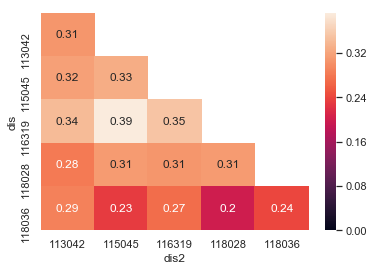

In [65]:
heat = pd.DataFrame(data,columns=['dis', 'dis2', 'prob'])
heat = heat.pivot('dis', 'dis2', 'prob')
with sns.axes_style("white"):
    ax = sns.heatmap(heat,vmin=0,annot=True,cmap="YlGnBu")


In [66]:
data2 = []
dis_sem22 = list(itertools.combinations(semestre2,3))
for dis in dis_sem22:
    aux = prob_evadiu([dis[0],dis[1],dis[2]],1) 
    #prob = prob_condicionais(aux[0],aux[1],prob_saida) 
    data2.append([str(dis[0]),str(dis[1])+'/'+str(dis[2]),aux])


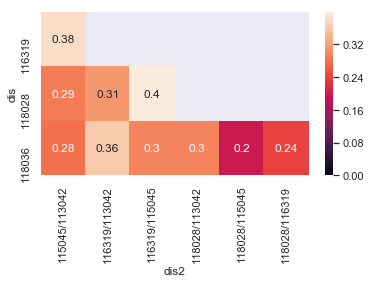

In [67]:
heat2 = pd.DataFrame(data2,columns=['dis', 'dis2', 'prob'])
heat2 = heat2.pivot('dis', 'dis2', 'prob')
fig2, ax2 = plt.subplots(figsize=(6,3))
with sns.axes_style("white"):
    ax2 = sns.heatmap(heat2,vmin=0,annot=True,cmap="YlGnBu")


In [68]:
data3 = []
dis_sem33 = list(itertools.combinations(semestre2,4))
for dis in dis_sem33:
    aux = prob_evadiu([dis[0],dis[1],dis[2],dis[3]],1) 
    #prob = prob_condicionais(aux[0],aux[1],prob_saida) 
    data3.append([str(dis[0])+'/'+str(dis[1]),str(dis[2])+'/'+str(dis[3]),aux])


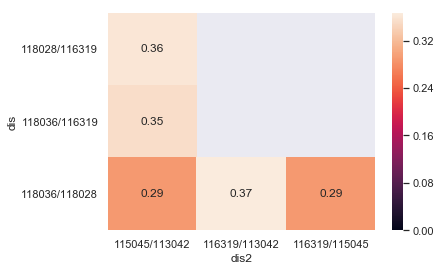

In [69]:
heat3 = pd.DataFrame(data3,columns=['dis', 'dis2', 'prob'])
heat3 = heat3.pivot('dis', 'dis2', 'prob')
fig3, ax3 = plt.subplots()
with sns.axes_style("white"):
    ax3 = sns.heatmap(heat3,vmin=0,annot=True,cmap="YlGnBu")


In [70]:
aux = prob_evadiu(semestre2,1) 
print(aux)

0.375
